In [20]:
import pandas as pd
import numpy as np

In [30]:
df = pd.read_csv('UK_weather_station_data_ghcnm.csv')
df.tail()

,country,name,station,lat,lon,elev,year,month,variable,value,dmflag,qcflag,dsflag
52135,UNITED KINGDOM,BELFAST/ALDER,65103917000,54.65,-6.22,81,2018,8,TAVG,NaN,,,
52136,UNITED KINGDOM,BELFAST/ALDER,65103917000,54.65,-6.22,81,2018,9,TAVG,NaN,,,
52137,UNITED KINGDOM,BELFAST/ALDER,65103917000,54.65,-6.22,81,2018,10,TAVG,NaN,,,
52138,UNITED KINGDOM,BELFAST/ALDER,65103917000,54.65,-6.22,81,2018,11,TAVG,NaN,,,
52139,UNITED KINGDOM,BELFAST/ALDER,65103917000,54.65,-6.22,81,2018,12,TAVG,NaN,,,


In [31]:
df = df.dropna(axis=0, how='any', subset=['value'])
df.tail()

,country,name,station,lat,lon,elev,year,month,variable,value,dmflag,qcflag,dsflag
52126,UNITED KINGDOM,BELFAST/ALDER,65103917000,54.65,-6.22,81,2017,11,TAVG,6.5,,,K
52127,UNITED KINGDOM,BELFAST/ALDER,65103917000,54.65,-6.22,81,2017,12,TAVG,5.1,,,K
52128,UNITED KINGDOM,BELFAST/ALDER,65103917000,54.65,-6.22,81,2018,1,TAVG,4.4,,,K
52129,UNITED KINGDOM,BELFAST/ALDER,65103917000,54.65,-6.22,81,2018,2,TAVG,3.5,,,K
52130,UNITED KINGDOM,BELFAST/ALDER,65103917000,54.65,-6.22,81,2018,3,TAVG,4.5,,,P


In [32]:
station_names = np.unique(df['name'])
station_names

array(['ABERDEEN/DYCE', 'ABERYSTWYTH         UK', 'BELFAST/ALDER',
       'BEN NEVIS           UK', 'BENTWATERS', 'BIDSTON             UK',
       'BIRMINGHAM/AI', 'BOURNEMOUTH A', 'BRAEMAR             UK',
       'CAMBRIDGE           UK', 'COCKLE PARK         UK',
       'DUMFRIES            UK', 'DURHAM              UK',
       'EDGBASTON           UK', 'EDINBURGH AIR',
       'EDINBURGH/ROYAL OBS.UK', 'ESKDALEMUIR', 'FAIRFORD', 'FELIXSTOWE',
       'FORT WILLIAM', 'GLAMORGAN/RHOUSE AP', 'GLASGOW AIRPO',
       'GORDON CASTLE       UK', 'GORLESTON', 'GREENHAM',
       'GREENWICH/MARITIME MUK', 'GUERNSEY AIRP', 'HUNTINGTON',
       'KEW                 UK', 'LAKENHEATH', 'LARKHILL', 'LEEMING',
       'LERWICK', 'LONDON/GATWIC', 'MANCHESTER AI', 'MILDENHALL',
       'ORKNEY              UK', 'OSBORNE             UK', 'OXFORD',
       'OXFORD              UK', 'PLYMOUTH WC', 'ROSS-ON-WYE         UK',
       'ROTHAMSTEAD         UK', 'SCARBOROUGH         UK', 'SCULTHORPE',
       'SHEFFI

In [35]:
df = df[ df['station'] == 65103683002 ]
df.tail()

,country,name,station,lat,lon,elev,year,month,variable,value,dmflag,qcflag,dsflag
40143,UNITED KINGDOM,CAMBRIDGE UK,65103683002,52.2,0.1,12,1969,4,TAVG,7.6,,,G
40144,UNITED KINGDOM,CAMBRIDGE UK,65103683002,52.2,0.1,12,1969,5,TAVG,12.5,,,G
40145,UNITED KINGDOM,CAMBRIDGE UK,65103683002,52.2,0.1,12,1969,6,TAVG,14.3,,,G
40146,UNITED KINGDOM,CAMBRIDGE UK,65103683002,52.2,0.1,12,1969,7,TAVG,17.3,,,G
40147,UNITED KINGDOM,CAMBRIDGE UK,65103683002,52.2,0.1,12,1969,8,TAVG,16.7,,,G


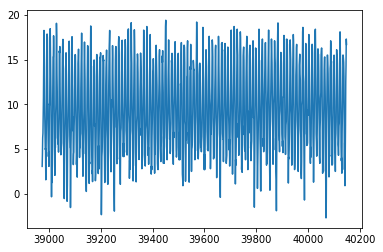

In [36]:
df['value'].plot()